In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from unicodedata import category

In [45]:
df = pd.read_csv("data/resume.csv")


In [46]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [47]:
df.shape


(962, 2)

In [48]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

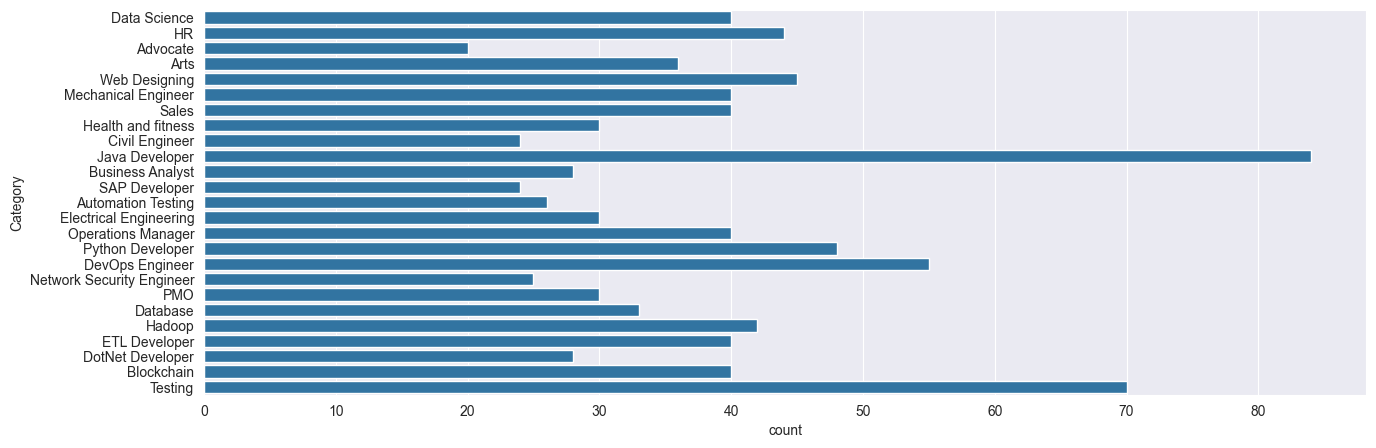

In [49]:
plt.figure(figsize = (15,5))
sns.countplot(df['Category'])
plt.show()

In [50]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

In [51]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

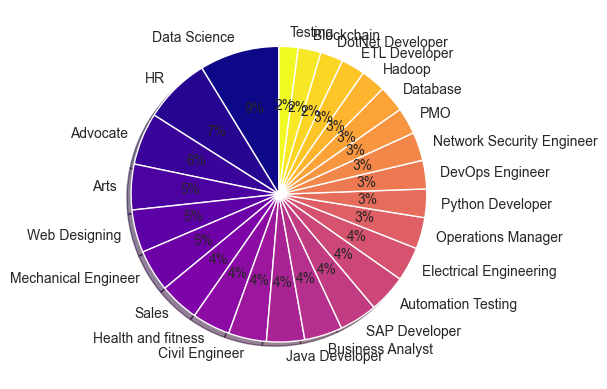

<Figure size 1500x500 with 0 Axes>

In [52]:
plt.pie(counts,labels=labels,autopct='%1.0f%%',shadow=True, startangle=90, colors=plt.cm.plasma(np.linspace(0,1,len(labels))))
plt.figure(figsize = (15,5))
plt.show()

In [53]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [54]:
import re

def cleanResume(txt):
    # Remove URLs
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    # Remove RT and cc
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    # Remove mentions (@user)
    cleanText = re.sub(r'@\S+\s', ' ', cleanText)
    # Remove hashtags
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    # Remove special characters
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)
    # Remove non-ASCII characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    # Remove extra whitespaces
    cleanText = re.sub(r'\s+', ' ', cleanText)

    return cleanText


In [55]:
df["Resume"] = df['Resume'].apply(lambda x: cleanResume(x))

In [56]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requredText = tfidf.transform(df['Resume'])

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

In [62]:
X_train.shape

(769, 7351)

In [63]:
X_test.shape

(193, 7351)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from  sklearn.metrics import accuracy_score
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9844559585492227


In [66]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(knn, open('encoder.pkl.pkl', 'wb'))

In [67]:
myResume = """MOHAMMEDALI PATEL
Pinnacle Work, Chatbot & Transcription Work Jun 2023 - Jul 2023
Enhanced Superbot’s accuracy by 15%, improving chatbot responses on Parul website.
Achieved 98% accuracy in transcription tasks, ranking in the top 3% for efficiency.
Gained hands-on experience in chatbot technology and text processing.

INTERNSHIP
Edu-versity, Data Science Intern Dec 2024 - Mar 2025
Built 6+ data science projects, applying machine learning, NLP, and AI.
Built a Handwritten Digit Recognition system with 94.48% accuracy using LeNet-5.
Developed an AI Video Generator, automating video creation and reducing manual effort.

QUALIFICATION
Bachelor of Technology in Computer Science and Engineering Aug 2022 - Jun 2026
Parul University
Relevant coursework in Data Structures, Algorithms, Database Management Systems, and Computer Networks.
Actively working on data science projects and hands-on machine learning applications.

PROJECTS
Handwritten Digit Recognition (LeNet-5)
Built a deep learning model using LeNet-5 architecture on the MNIST dataset, achieving 94.48% accuracy.
Preprocessed and trained on 60,000+ handwritten digit images using TensorFlow.
Visualized predictions and validated performance through accuracy/loss graphs and test set evaluation.

Password Strength Classification | NLP & Machine Learning
Engineered a logistic regression model to classify password strength (weak/medium/strong) using TF-IDF
vectorization and feature analysis, achieving 80% accuracy.
Conducted exploratory data analysis on 100K passwords, uncovering key trends (e.g., length, special
characters) with Matplotlib/Seaborn visualizations.
Designed a Python function for real-time password strength prediction, demonstrating end-to-end ML
deployment.

SKILLS
Programming & Data Science: Python (Pandas, NumPy, Scikit-learn, TensorFlow), SQL, Java
Machine Learning & AI: Supervised & Unsupervised Learning, Deep Learning, NLP, Model Deployment
Data Analysis & Visualization: Tableau, Power BI, Matplotlib, Seaborn, Plotly, Exploratory Data Analysis (EDA)
Cloud: AWS, Azure
Version Control & Collaboration: Git, GitHub
Databases: MySQL, PostgreSQL, MongoDB, Firebase, Supabase
Soft Skills: Problem-Solving, Critical Thinking, Adaptability, Team Collaboration, Time Management,
Continuous Learning, Data Storytelling
Data Engineering, Data Wrangling, Data Cleaning, Data Preprocessing, Statistical Analysis, Predictive
Modeling, Feature Engineering, Model Evaluation, Data Pipeline, PyTorch, Keras, Jupyter Notebook, Apache
Spark, Hadoop, Excel, Git, Data Interpretation, Data Labeling, Feature Selection, Data Extraction,
Data Privacy, Algorithms
Languages: English, Hindi, Gujarati

ADDITIONAL INFORMATION
Awards/Activities:
- Hall of Fame – Recognized for finding a bug in NASA’s official system (2024)
- Onboarding Project Lead (2024)
- Most Innovative Intern of the Year (2022)

SUMMARY
Aspiring Data Scientist with hands-on experience in Python, machine learning, and data analysis. Developed 6+
impactful projects, including a digit recognition system with 94.4% accuracy. Skilled in building predictive models,
visualizing data insights, and deploying scalable solutions. Seeking global internship opportunities to apply
data-driven strategies and contribute to innovative, AI-powered solutions.

CONTACT
mohdalipatel8976@gmail.com | linkedin.com/in/alipatel786 | github.com/mohdalipatel8976 | +91 99792 03331
VISIT: www.alimack.news
"""


In [70]:
import pickle
tfidf = pickle.load(open('tfidf.pkl', 'rb'))
knn = pickle.load(open('encoder.pkl.pkl', 'rb'))
cleaned_resume = cleanResume(myResume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = knn.predict(input_features)[0]
category_mapping = {
    15: "Java Developer",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    2: "DotNet Developer",
    15: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    23: "Civil Engineer",
    5: "Advocate",
    23: "Testing"
}
category_name = category_mapping.get(prediction_id, "Unknown")
print(category_name)
print("Predicted Category ID:", prediction_id)

Data Science
Predicted Category ID: 6
